### Step 1: Importing dependencies

In [1]:
#EDA
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score


In [2]:
import warnings
warnings.filterwarnings("ignore")

### Step 2 : Data preprocessing

In [3]:
df=pd.read_csv("mushrooms.csv")
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df.shape

(8124, 23)

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df.rename(columns={'cap-shape':'cap_shape','cap-surface':'cap_surface', 'cap-color':'cap_color',
       'gill-attachment':'gill_attachment', 'gill-spacing':'gill_spacing', 'gill-size':'gill_size', 'gill-color':'gill_color',
       'stalk-shape':'stalk_shape', 'stalk-root':'stalk_root', 'stalk-surface-above-ring':'stalk_surface_above_ring',
       'stalk-surface-below-ring':'stalk_surface_below_ring', 'stalk-color-above-ring':'stalk_color_above_ring',
       'stalk-color-below-ring':'stalk_color_below_ring', 'veil-color':'veil_color', 'ring-number':'ring_number',
       'ring-type':'ring_type', 'spore-print-color':'spore_print_color'},inplace=True)

### Step 3: EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [9]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap_shape,8124,6,x,3656
cap_surface,8124,4,y,3244
cap_color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill_attachment,8124,2,f,7914
gill_spacing,8124,2,c,6812
gill_size,8124,2,b,5612
gill_color,8124,12,b,1728


there are no missing values

In [10]:
df[df.duplicated()]

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil-type,veil_color,ring_number,ring_type,spore_print_color,population,habitat


there are no duplicated rows

### checking for the balanced dataset

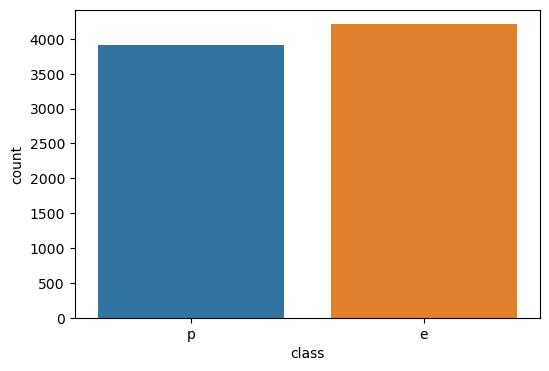

In [11]:
# target column
plt.figure(figsize=(6,4))

sns.countplot(x='class',data=df)
plt.show()

### Step 4 A) univariate analysis

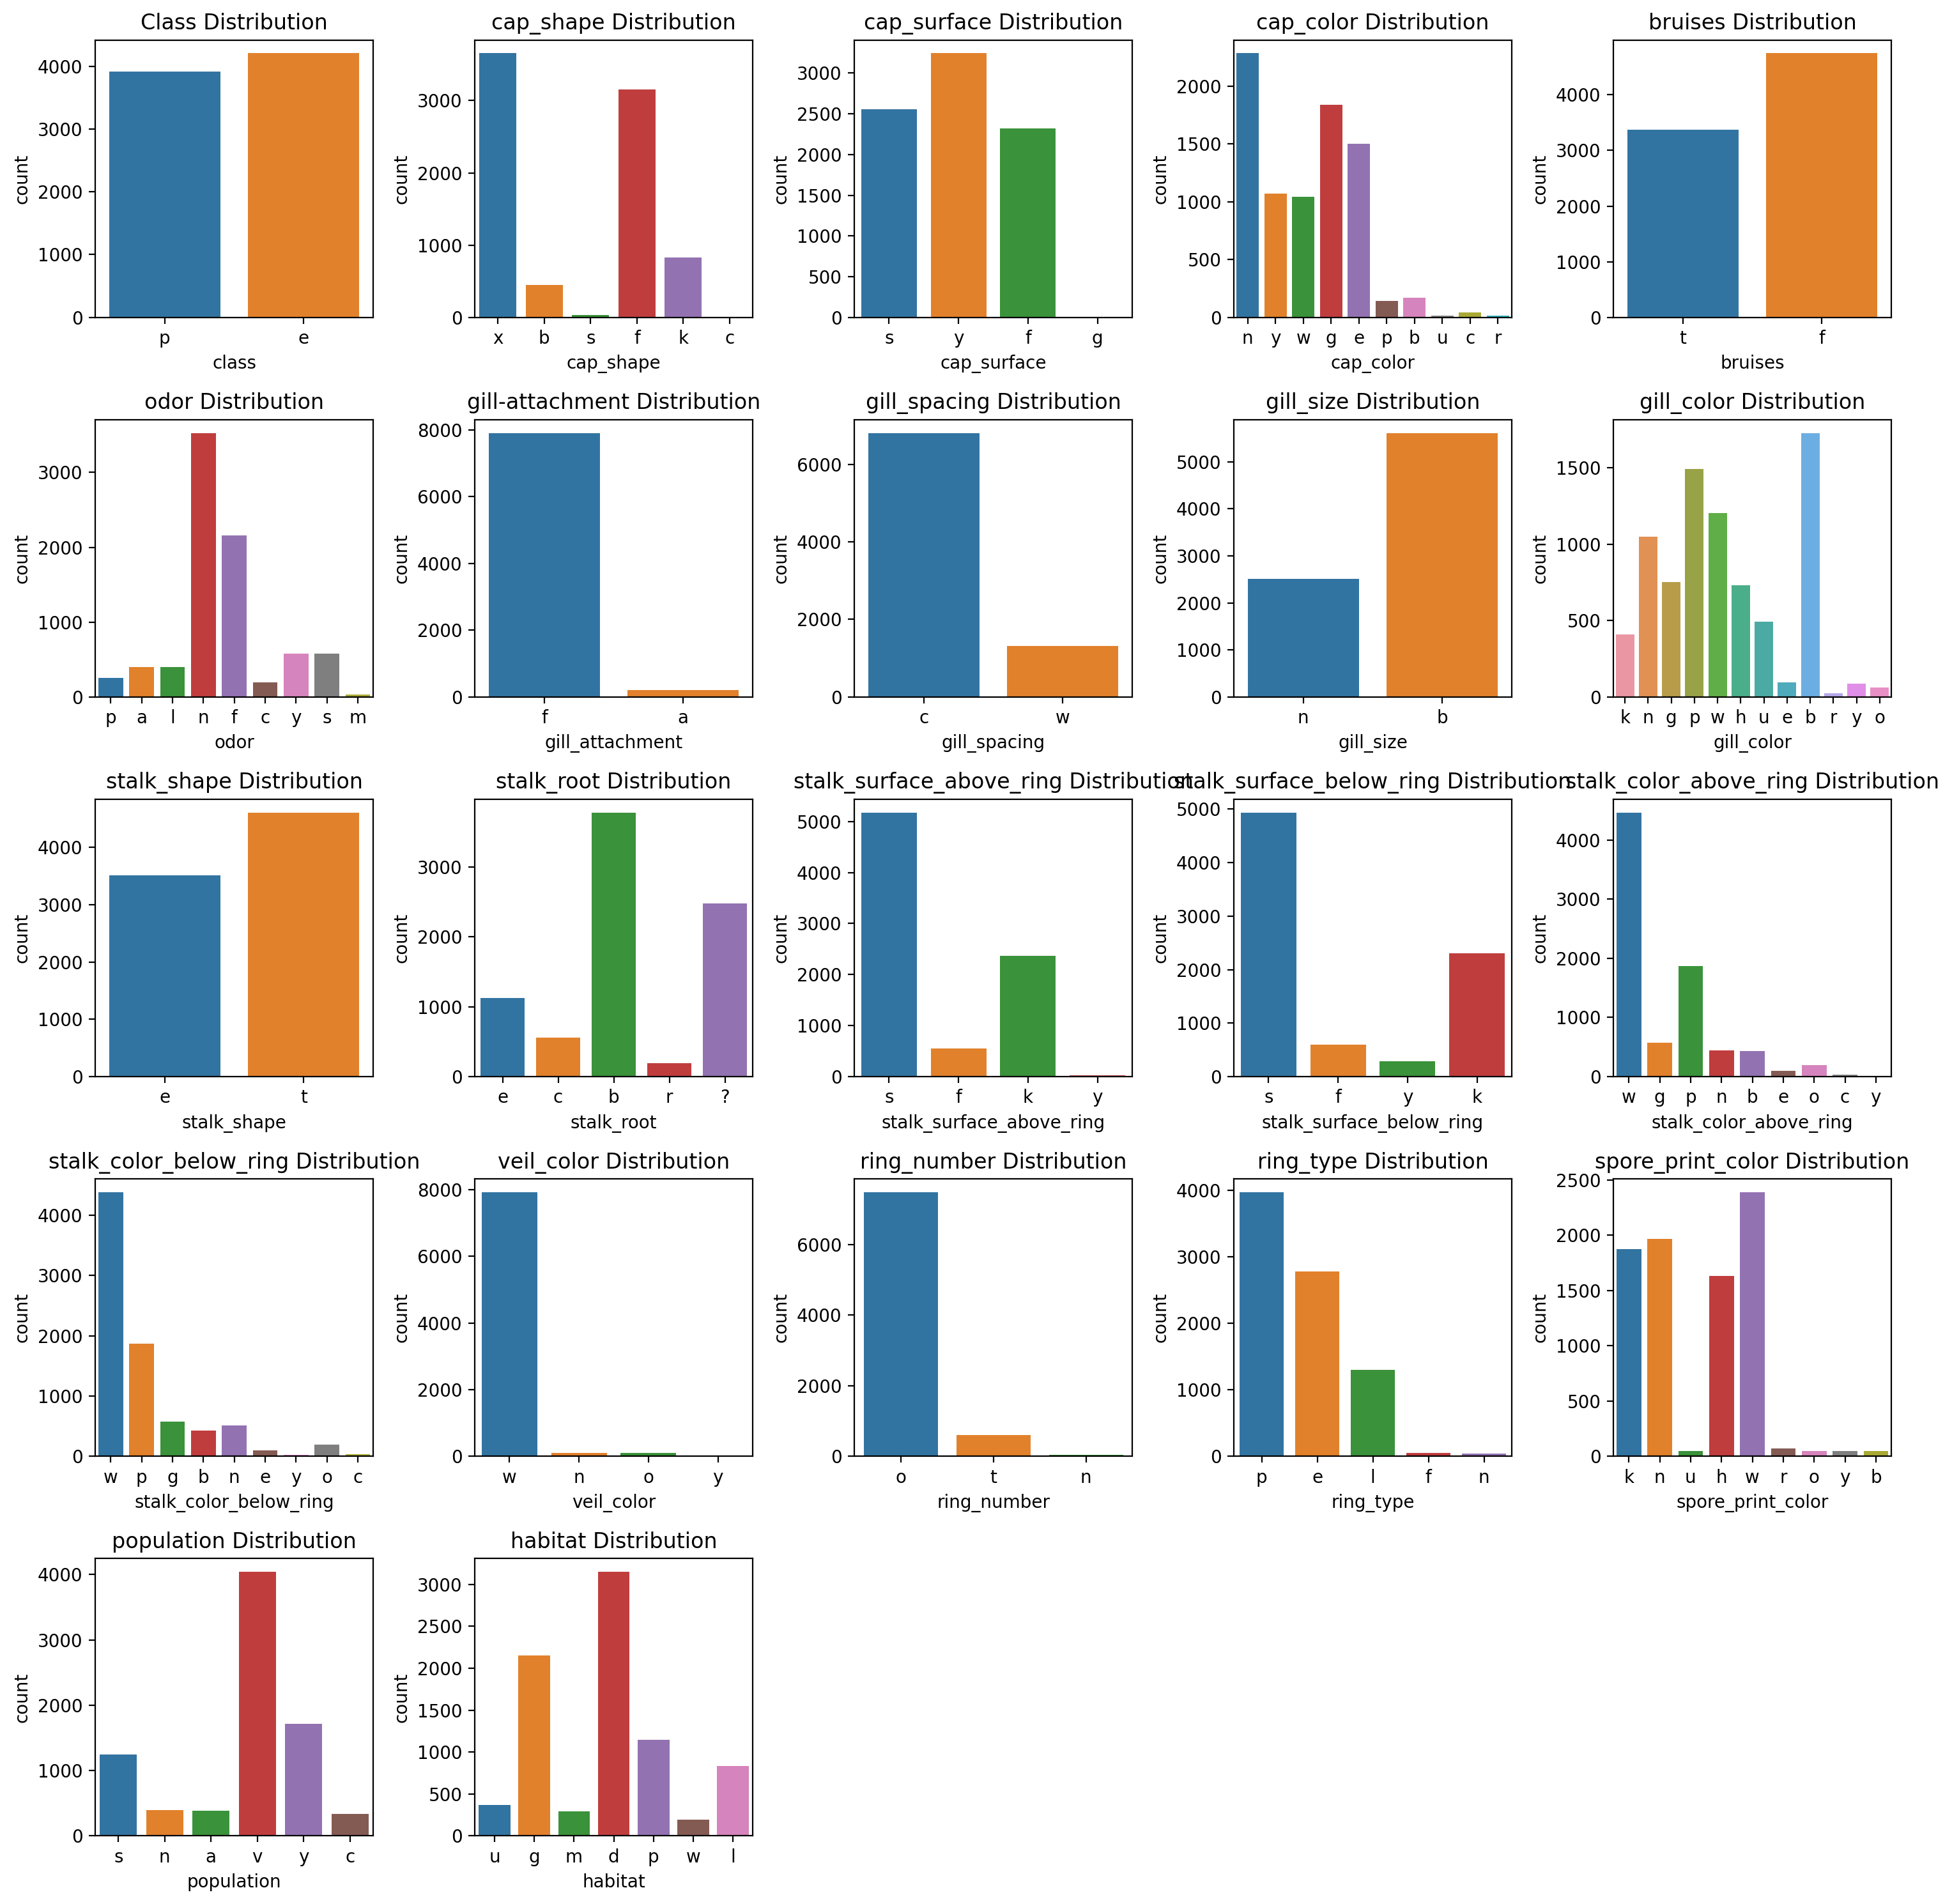

In [12]:
plt.figure(figsize=(15,15),dpi=200)

plt.subplot(5,5,1)
sns.countplot(x=df['class'])
plt.title("Class Distribution")

plt.subplot(5,5,2)
sns.countplot(x=df.cap_shape)
plt.title("cap_shape Distribution")

plt.subplot(5,5,3)
sns.countplot(x=df.cap_surface)
plt.title("cap_surface Distribution")

plt.subplot(5,5,4)
sns.countplot(x=df.cap_color)
plt.title("cap_color Distribution")

plt.subplot(5,5,5)
sns.countplot(x=df.bruises)
plt.title("bruises Distribution")

#===========================================================================

plt.subplot(5,5,6)
sns.countplot(x=df.odor)
plt.title("odor Distribution")

plt.subplot(5,5,7)
sns.countplot(x=df.gill_attachment)
plt.title("gill-attachment Distribution")

plt.subplot(5,5,8)
sns.countplot(x=df.gill_spacing)
plt.title("gill_spacing Distribution")

plt.subplot(5,5,9)
sns.countplot(x=df.gill_size)
plt.title("gill_size Distribution")

plt.subplot(5,5,10)
sns.countplot(x=df.gill_color)
plt.title("gill_color Distribution")

#================================================================================

plt.subplot(5,5,11)
sns.countplot(x=df.stalk_shape)
plt.title("stalk_shape Distribution")

plt.subplot(5,5,12)
sns.countplot(x=df.stalk_root)
plt.title("stalk_root Distribution")

plt.subplot(5,5,13)
sns.countplot(x=df.stalk_surface_above_ring)
plt.title("stalk_surface_above_ring Distribution")

plt.subplot(5,5,14)
sns.countplot(x=df.stalk_surface_below_ring)
plt.title("stalk_surface_below_ring Distribution")

plt.subplot(5,5,15)
sns.countplot(x=df.stalk_color_above_ring)
plt.title("stalk_color_above_ring Distribution")

#==================================================================================

plt.subplot(5,5,16)
sns.countplot(x=df.stalk_color_below_ring)
plt.title("stalk_color_below_ring Distribution")

plt.subplot(5,5,17)
sns.countplot(x=df.veil_color)
plt.title("veil_color Distribution")

plt.subplot(5,5,18)
sns.countplot(x=df.ring_number)
plt.title("ring_number Distribution")

plt.subplot(5,5,19)
sns.countplot(x=df.ring_type)
plt.title("ring_type Distribution")

plt.subplot(5,5,20)
sns.countplot(x=df.spore_print_color)
plt.title("spore_print_color Distribution")

#=============================================================================================

plt.subplot(5,5,21)
sns.countplot(x=df.population)
plt.title("population Distribution")

plt.subplot(5,5,22)
sns.countplot(x=df.habitat)
plt.title("habitat Distribution")


plt.tight_layout()

In [13]:
# since from stack root count plot we can see almost 30% values are missing or misplaced

In [14]:
df['stalk_root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk_root, dtype: int64

In [15]:
df['stalk_root'] = df['stalk_root'].replace('?', 'unknown')

In [16]:
df['stalk_root'].value_counts()

b          3776
unknown    2480
e          1120
c           556
r           192
Name: stalk_root, dtype: int64

In [17]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil-type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [18]:
for i in df.columns:
    print(df[i].value_counts(dropna=False))
    
    print('-'*100)
    
    print('% contribution')
    
    print(round((df[i].value_counts()/df.shape[0]),4)*100)
    
    print('='*100)

e    4208
p    3916
Name: class, dtype: int64
----------------------------------------------------------------------------------------------------
% contribution
e    51.8
p    48.2
Name: class, dtype: float64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap_shape, dtype: int64
----------------------------------------------------------------------------------------------------
% contribution
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap_shape, dtype: float64
y    3244
s    2556
f    2320
g       4
Name: cap_surface, dtype: int64
----------------------------------------------------------------------------------------------------
% contribution
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap_surface, dtype: float64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap_color, dtype: int64
------------------------------------------------------------------------------------------

Unvariate Analisys:

cap-shape - Most of the mushrooms in our dataset have a convex (45%) or a flat (38.8%) cap

cap-surface - Most frequent cap surface is scaly (39.93%) we have next to non grooves (0.05%)

cap-color - Over half of the mushrooms in our dataset have a brown (28.11%) or a gray (22.65%) cap color, we also have 8 other colors that appear less often.

bruises - Most of the mushrooms in our dataset are not bruised (58.44%)

odor - Most frequent scents (over 70%) are either no smell (43.43%) or a foul smell (26.59%).

gill-attachment - Almost our entire data has free gill attachment (about 97.5%) so this column is pretty much usless in our analysis.

gill-spacing - More than 85% of the mushrooms in our dataset have a close gill spacing so it has little to no impact in our analysis.

gill-size - Most of the mushrooms in our dataset have a broad (69.08%) gil sizes others are narrow.

gill-color - Over half of the mushrooms in our dataset have a buff (21.27%),pink (18.37%) or a white (22.65%) gill color, we also have 9 other colors that appear less often.

stalk-shape - Most of the mushrooms in our dataset have a tapering (56.72%) others are enlarging.

stalk-root - Most frequent stalk roots (over 75%) are either bulbous (46.48%) or silky (30.53%).

stalk-surface-above-ring - Most frequent stalk surface above ring (over 90%) are either smooth (63.71%) or silky (29.2%).

stalk-surface-below-ring - Most frequent stalk surface below ring (almost 90%) are either smooth (60.76%) or silky (28.36%) next to no difference from stalk-surface-above-ring.

stalk-color-above-ring - Over half of the mushrooms in our dataset have a white (54.95%) stalk color, we also have 8 other colors that appear less often.

stalk-color-below-ring - Over half of the mushrooms in our dataset have a white (53.96%) stalk color, we also have 8 other colors that appear less often, next to no difference from stalk-color-above-ring.

veil-type - All veil type of the mushroom's are partial so this column is pretty much usless in our analysis.

veil-color - Almost all of the mushroom's veil color are white (97.54%) so this column is pretty much usless in our analysis.

ring-number - Almost all of the mushroom's ring number amount are one (92.17%) so this column is pretty much usless in our analysis.

ring-type - Over 98% of the mushrooms in our dataset have a pendant (48.84%),evanescent (34.17%) or a large (15.95%) ring type.

spore-print-color - most frequent colors are white (29.39%),brown (24.22%) ,black (23.04%) and chocolate (20.09%), the other colors are insignificant.

population - Most frequent populations (over 70%) are either several (49.73%) or solitary (21.07%).

habitat - Most frequent habitats (over 65%) are either woods (38.75%) or grasses (26.44%).

In [19]:
### Cardinality reduction in order to reduce the number of columns

def cap_shape_rep(x):
    l1=['x','f','k']
    if x in l1:
        return x
    else:
        return 'other'

In [20]:
df['cap_shape']=df['cap_shape'].map(cap_shape_rep)

In [21]:
df['cap_shape'].value_counts()

x        3656
f        3152
k         828
other     488
Name: cap_shape, dtype: int64

In [22]:
def cap_color_rep(x):
    l1=['n','y','w','g','e']
    if x in l1:
        return x
    else:
        return 'other'

In [23]:
df['cap_color']=df['cap_color'].map(cap_color_rep)

In [24]:
df['cap_color'].value_counts()

n        2284
g        1840
e        1500
y        1072
w        1040
other     388
Name: cap_color, dtype: int64

In [25]:
def odor_rep(x):
    l1=['n','f']
    if x in l1:
        return x
    else:
        return 'other'

In [26]:
df['odor']=df['odor'].map(odor_rep)

In [27]:
df['odor'].value_counts()

n        3528
other    2436
f        2160
Name: odor, dtype: int64

In [28]:
def gill_color_rep(x):
    l1=['b','p','w','n','g','h']
    if x in l1:
        return x
    else:
        return 'other'

In [29]:
df['gill_color']=df['gill_color'].map(gill_color_rep)

In [30]:
df['gill_color'].value_counts()

b        1728
p        1492
w        1202
other    1170
n        1048
g         752
h         732
Name: gill_color, dtype: int64

In [31]:
def stalk_root_rep(x):
    l1=['b','e','unknown']
    if x in l1:
        return x
    else:
        return 'other'

In [32]:
df['stalk_root']=df['stalk_root'].map(stalk_root_rep)

In [33]:
df['stalk_root'].value_counts()

b          3776
unknown    2480
e          1120
other       748
Name: stalk_root, dtype: int64

In [34]:
df['stalk_surface_above_ring'].value_counts()

s    5176
k    2372
f     552
y      24
Name: stalk_surface_above_ring, dtype: int64

In [35]:
def stalk_surface_above_ring_rep(x):
    l1=['s','k']
    if x in l1:
        return x
    else:
        return 'other'

In [36]:
df['stalk_surface_above_ring']=df['stalk_surface_above_ring'].map(stalk_surface_above_ring_rep)

In [37]:
df['stalk_surface_above_ring'].value_counts()

s        5176
k        2372
other     576
Name: stalk_surface_above_ring, dtype: int64

In [38]:
def stalk_surface_below_ring_rep(x):
    l1=['s','k']
    if x in l1:
        return x
    else:
        return 'other'

In [39]:
df['stalk_surface_below_ring']=df['stalk_surface_below_ring'].map(stalk_surface_above_ring_rep)

In [40]:
df['stalk_surface_below_ring'].value_counts()

s        4936
k        2304
other     884
Name: stalk_surface_below_ring, dtype: int64

In [41]:
df['veil_color'].value_counts()

w    7924
n      96
o      96
y       8
Name: veil_color, dtype: int64

In [42]:
def veil_color_rep(x):
    l1=['w']
    if x in l1:
        return x
    else:
        return 'other'

In [43]:
df['veil_color']=df['veil_color'].map(veil_color_rep)

In [44]:
df['veil_color'].value_counts()

w        7924
other     200
Name: veil_color, dtype: int64

In [45]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil-type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [46]:
df['ring_number'].value_counts()

o    7488
t     600
n      36
Name: ring_number, dtype: int64

In [47]:
def ring_number_rep(x):
    l1=['o']
    if x in l1:
        return x
    else:
        return 'other'

In [48]:
df['ring_number']=df['ring_number'].map(ring_number_rep)

In [49]:
df['ring_number'].value_counts()

o        7488
other     636
Name: ring_number, dtype: int64

In [50]:
def ring_type_rep(x):
    l1=['p','e','l']
    if x in l1:
        return x
    else:
        return 'other'

In [51]:
df['ring_type'].value_counts()

p    3968
e    2776
l    1296
f      48
n      36
Name: ring_type, dtype: int64

In [52]:
df['ring_type']=df['ring_type'].map(ring_type_rep)

In [53]:
df['ring_type'].value_counts()

p        3968
e        2776
l        1296
other      84
Name: ring_type, dtype: int64

### Bivariate analysis

In [54]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil-type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

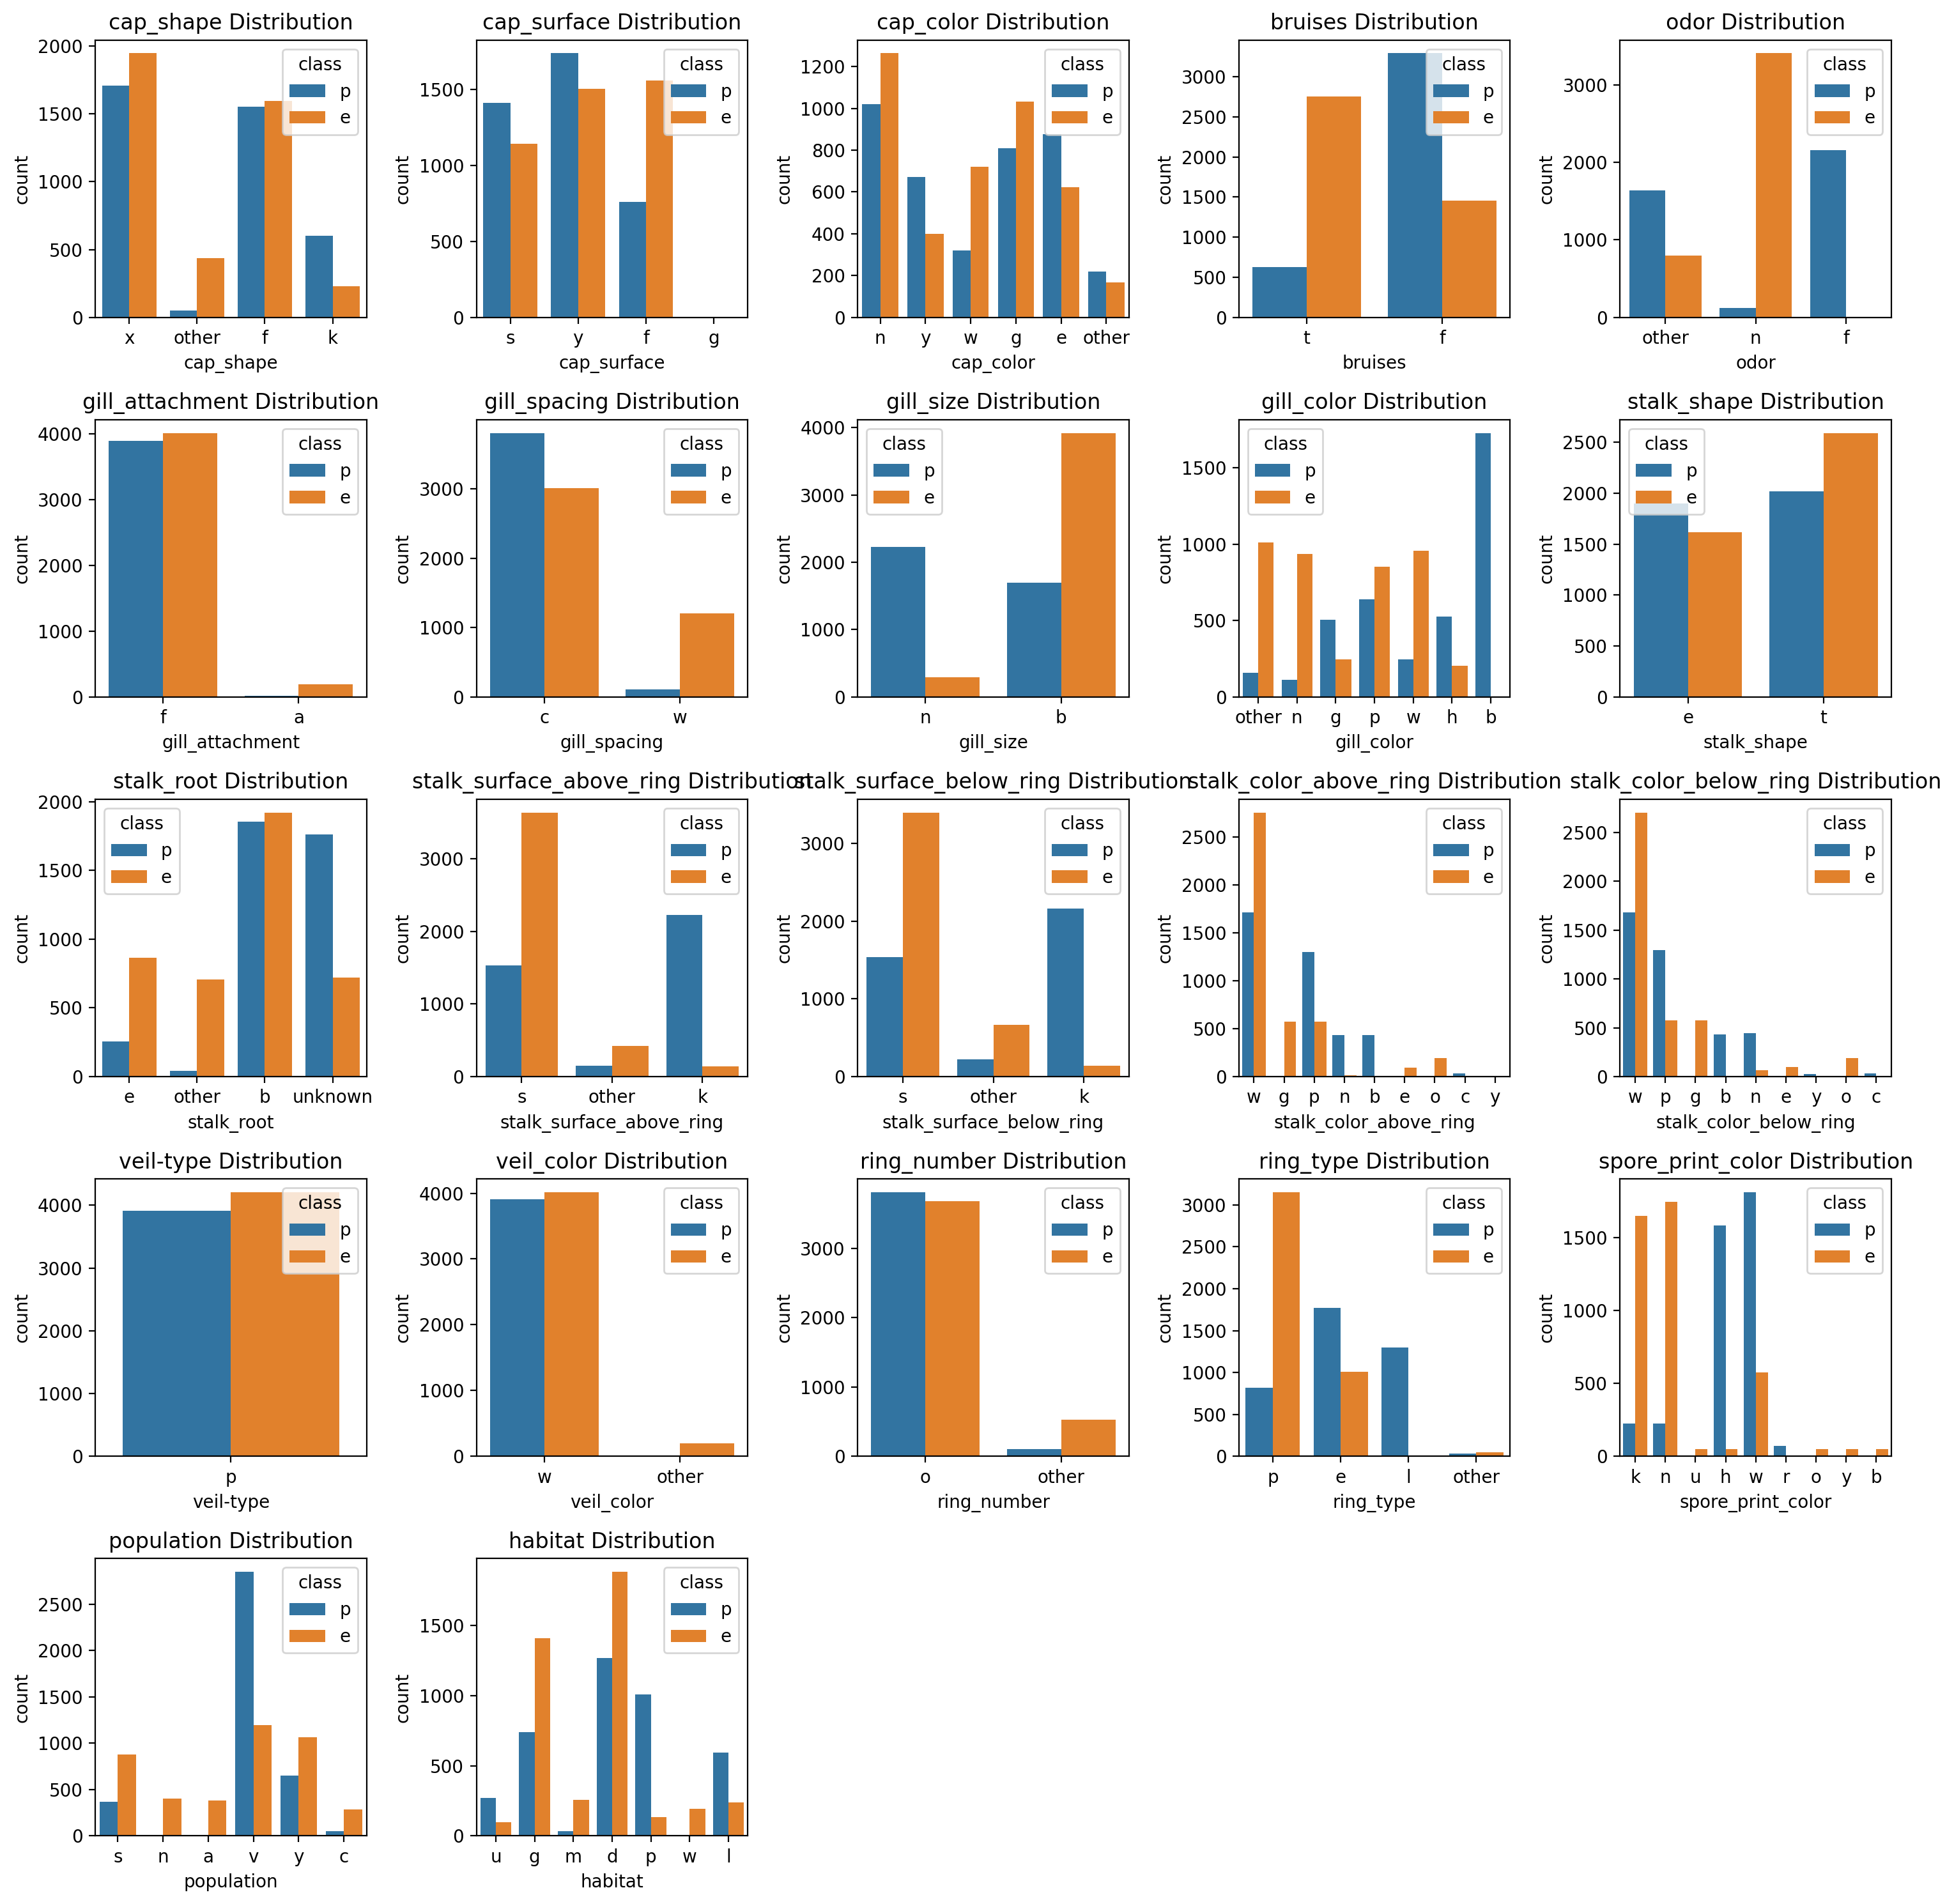

In [55]:
plt.figure(figsize=(15,15),dpi=200)

plt.subplot(5,5,1)
sns.countplot(data=df, x="cap_shape", hue="class")
plt.title("cap_shape Distribution")

plt.subplot(5,5,2)
sns.countplot(data=df, x="cap_surface", hue="class")
plt.title("cap_surface Distribution")

plt.subplot(5,5,3)
sns.countplot(data=df, x="cap_color", hue="class")
plt.title("cap_color Distribution")

plt.subplot(5,5,4)
sns.countplot(data=df, x="bruises", hue="class")
plt.title("bruises Distribution")

plt.subplot(5,5,5)
sns.countplot(data=df, x="odor", hue="class")
plt.title("odor Distribution")

#===========================================================================

plt.subplot(5,5,6)
sns.countplot(data=df, x="gill_attachment", hue="class")
plt.title("gill_attachment Distribution")

plt.subplot(5,5,7)
sns.countplot(data=df, x="gill_spacing", hue="class")
plt.title("gill_spacing Distribution")

plt.subplot(5,5,8)
sns.countplot(data=df, x="gill_size", hue="class")
plt.title("gill_size Distribution")

plt.subplot(5,5,9)
sns.countplot(data=df, x="gill_color", hue="class")
plt.title("gill_color Distribution")

plt.subplot(5,5,10)
sns.countplot(data=df, x="stalk_shape", hue="class")
plt.title("stalk_shape Distribution")

#================================================================================

plt.subplot(5,5,11)
sns.countplot(data=df, x="stalk_root", hue="class")
plt.title("stalk_root Distribution")

plt.subplot(5,5,12)
sns.countplot(data=df, x="stalk_surface_above_ring", hue="class")
plt.title("stalk_surface_above_ring Distribution")

plt.subplot(5,5,13)
sns.countplot(data=df, x="stalk_surface_below_ring", hue="class")
plt.title("stalk_surface_below_ring Distribution")

plt.subplot(5,5,14)
sns.countplot(data=df, x="stalk_color_above_ring", hue="class")
plt.title("stalk_color_above_ring Distribution")

plt.subplot(5,5,15)
sns.countplot(data=df, x="stalk_color_below_ring", hue="class")
plt.title("stalk_color_below_ring Distribution")

#==================================================================================

plt.subplot(5,5,16)
sns.countplot(data=df, x="veil-type", hue="class")
plt.title("veil-type Distribution")

plt.subplot(5,5,17)
sns.countplot(data=df, x="veil_color", hue="class")
plt.title("veil_color Distribution")

plt.subplot(5,5,18)
sns.countplot(data=df, x="ring_number", hue="class")
plt.title("ring_number Distribution")

plt.subplot(5,5,19)
sns.countplot(data=df, x="ring_type", hue="class")
plt.title("ring_type Distribution")

plt.subplot(5,5,20)
sns.countplot(data=df, x="spore_print_color", hue="class")
plt.title("spore_print_color Distribution")

#=============================================================================================

plt.subplot(5,5,21)
sns.countplot(data=df, x="population", hue="class")
plt.title("population Distribution")

plt.subplot(5,5,22)
sns.countplot(data=df, x="habitat", hue="class")
plt.title("habitat Distribution")


plt.tight_layout()

cap-shape - Most of the knobbed mushrooms in our dataset are poisonous.

cap-surface - Most fibrous cap surface are edible.

cap-color - Most white cap colored mushrooms are edible while most yellow cap colored mushrooms are poisonous.

bruises - Bruised mushrooms are usually edible while unbruised ones are usually the oppisite.

odor - No smell mushrooms are mostly edible by a wide margin while all foul smell mushrooms are poisonous.

gill-attachment - The attached gills are almost always edible.

gill-spacing - The crowded gills are almost always edible.

gill-size - The narrow gill sized mushrooms are almost always poisonous.

gill-color - The buff gill colored mushrooms are always poisonous.

stalk-shape - insignificant difference betwwen each value in terms of poisonous or edible.

stalk-root - Mushrooms with missing data of stalk roots are usually poisonous.

stalk-surface-above-ring - The silky mushrooms are usually poisonous, smooth are usually edible.

stalk-surface-below-ring - About the same as stalk-surface-above-ring.

stalk-color-above-ring - The white stalk colored mushrooms are usually edible, pink ones are mostly poisonous.

stalk-color-below-ring - About the same as stalk-color-above-ring.

veil-type - All veil type of the mushroom's are partial so this column is pretty much usless in our analysis.

veil-color - Almost all of the mushroom's veil color are white (97.54%) so this column is pretty much usless in our analysis.

ring-number - Almost all of the mushroom's ring number amount are one (92.17%) so this column is pretty much usless in our analysis.

ring-type - The pendant ring typed mushrooms are mostly edible,evanescent are mostly poisonous and large ring types are all poisonous.

spore-print-color - The brown and black ones are almost entirely edible while white and chocolate (20.09%) are mostly poisonous.

population - Mushrooms with a several population are mostly poisonous.

habitat - The woods or grasses grown mushrooms are mostly edible.

In [56]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil-type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [57]:
### there are some columns we can drop since they are completely partial to one group thus it is useless.

In [58]:
df.drop(['veil-type','veil_color','ring_number'],axis=1,inplace=True)

In [59]:
df.shape

(8124, 20)

### Feature engineering >> feature selection through chi-square test

In [60]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,other,f,c,n,other,e,e,s,s,w,w,p,k,s,u
1,e,x,s,y,t,other,f,c,b,other,e,other,s,s,w,w,p,n,n,g
2,e,other,s,w,t,other,f,c,b,n,e,other,s,s,w,w,p,n,n,m
3,p,x,y,w,t,other,f,c,n,n,e,e,s,s,w,w,p,k,s,u
4,e,x,s,g,f,n,f,w,b,other,t,e,s,s,w,w,e,n,a,g


In [61]:
X=df.drop('class',axis=1)
Y=df['class']

In [62]:
X.head(5)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,ring_type,spore_print_color,population,habitat
0,x,s,n,t,other,f,c,n,other,e,e,s,s,w,w,p,k,s,u
1,x,s,y,t,other,f,c,b,other,e,other,s,s,w,w,p,n,n,g
2,other,s,w,t,other,f,c,b,n,e,other,s,s,w,w,p,n,n,m
3,x,y,w,t,other,f,c,n,n,e,e,s,s,w,w,p,k,s,u
4,x,s,g,f,n,f,w,b,other,t,e,s,s,w,w,e,n,a,g


In [63]:
Y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [64]:
import pandas as pd
from scipy.stats import chi2_contingency


# Create a DataFrame to store the chi-square statistics and p-values

chi_square_results = pd.DataFrame(columns=['Feature', 'Chi2_Statistic', 'P_Value'])

for feature in X.columns:
    
    # Create a contingency table
    contingency_table = pd.crosstab(X[feature], Y)
    
    # Perform the chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Store the results
    chi_square_results = chi_square_results.append({'Feature': feature, 'Chi2_Statistic': chi2, 'P_Value': p}, ignore_index=True)

# Display the DataFrame sorted by p-values (lowest to highest)
chi_square_results = chi_square_results.sort_values(by='P_Value')
print(chi_square_results)


                     Feature  Chi2_Statistic        P_Value
18                   habitat     1573.777261   0.000000e+00
16         spore_print_color     4602.033170   0.000000e+00
15                 ring_type     2874.227122   0.000000e+00
3                    bruises     2041.415647   0.000000e+00
4                       odor     5507.849870   0.000000e+00
14    stalk_color_below_ring     2152.390891   0.000000e+00
7                  gill_size     2366.834257   0.000000e+00
8                 gill_color     3673.541820   0.000000e+00
17                population     1929.740891   0.000000e+00
11  stalk_surface_above_ring     2807.802571   0.000000e+00
12  stalk_surface_below_ring     2683.885728   0.000000e+00
13    stalk_color_above_ring     2237.898496   0.000000e+00
10                stalk_root     1340.860786  2.003251e-290
6               gill_spacing      984.143333  5.022978e-216
0                  cap_shape      475.676106  8.907419e-103
1                cap_surface      315.04

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



### from the chi square test we could know the there is strong association between all the remained feature and target column

In [65]:
### splitting the data into train and test

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=41)

In [67]:
print(X.shape,X_train.shape,X_test.shape)

(8124, 19) (6499, 19) (1625, 19)


### feature encoding on training and test data seperately

In [68]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [69]:
X.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'ring_type', 'spore_print_color',
       'population', 'habitat'],
      dtype='object')

In [97]:
X['habitat'].value_counts()

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

In [70]:
ordinal_columns = ['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing',
                  'gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring',
                  'stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','ring_type',
                  'spore_print_color','population','habitat']

# Perform ordinal encoding on ordinal variables
ordinal_encoder = OrdinalEncoder(categories=[['other','k','f','x'], ['g','f','s','y'],['other','w','y','e','g','n'],['t','f'],
    ['f','other','n'],['a','f'],['w','c'],['n','b'],['h','g','n','other','w','p','b'],['e','t'],['other','e','unknown','b'],
    ['other','k','s'],['other','k','s'],['y','c','e','o','b','n','g','p','w'],['y','c','e','o','b','n','g','p','w'],
    ['other','l','e','p'],['b','y','o','u','r','h','k','n','w'],['c','a','n','s','y','v'],['w','m','u','l','p','g','d']])

df_enc_x_train = pd.DataFrame(ordinal_encoder.fit_transform(X_train[ordinal_columns]))
df_enc_x_train.columns = ordinal_columns

In [71]:
df_enc_x_test = pd.DataFrame(ordinal_encoder.transform(X_test[ordinal_columns]))
df_enc_x_test.columns = ordinal_columns

In [72]:
# label encoding for target column
le=LabelEncoder()

In [74]:
df_enc_y_train=pd.DataFrame(le.fit_transform(Y_train))

In [76]:
df_enc_y_test=pd.DataFrame(le.transform(Y_test))

### Model building

### Logistic regression

In [106]:
from sklearn.linear_model import LogisticRegression

logit=LogisticRegression(random_state=41)

logit.fit(df_enc_x_train,df_enc_y_train)

logit_y_pred_train=logit.predict(df_enc_x_train)

logit_y_pred_train_acc=accuracy_score(df_enc_y_train,logit_y_pred_train)

print('Training accuracy for Logistic regression',round(logit_y_pred_train_acc,2))
print('-'*100)

logit_y_pred_test=logit.predict(df_enc_x_test)

logit_y_pred_test_acc=accuracy_score(df_enc_y_test,logit_y_pred_test)

print('Testing accuracy for Logistic regression',round(logit_y_pred_test_acc,2))
print('='*100)

Training accuracy for Logistic regression 0.99
----------------------------------------------------------------------------------------------------
Testing accuracy for Logistic regression 0.98


In [105]:
### cross validation

training_acc=cross_val_score(logit,df_enc_x_train,df_enc_y_train,cv=10)

testing_acc=cross_val_score(logit,df_enc_x_test,df_enc_y_test,cv=10)

print('logistic regression training accuracy after cross validation: ',round(training_acc.mean(),2))

print('Logistic regression testing accuracy after cross validation: ',round(testing_acc.mean(),2))

logistic regression training accuracy after cross validation:  0.98
Logistic regression testing accuracy after cross validation:  0.97


### K Nearest Neighbor Model

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(df_enc_x_train,df_enc_y_train)

knn_y_pred_train=knn.predict(df_enc_x_train)

knn_y_pred_train_acc=accuracy_score(df_enc_y_train,knn_y_pred_train)

print('training accuracy for KNN model: ',knn_y_pred_train_acc)

knn_y_pred_test=knn.predict(df_enc_x_test)

knn_y_pred_test_acc=accuracy_score(df_enc_y_test,knn_y_pred_test)

print('training accuracy for KNN model: ',knn_y_pred_test_acc)

training accuracy for KNN model:  1.0
training accuracy for KNN model:  1.0


In [111]:
### cross validation

training_acc=cross_val_score(knn,df_enc_x_train,df_enc_y_train,cv=10)

testing_acc=cross_val_score(knn,df_enc_x_test,df_enc_y_test,cv=10)

print('Knn training accuracy after cross validation: ',round(training_acc.mean(),2))

print('Knn testing accuracy after cross validation: ',round(testing_acc.mean(),2))

Knn training accuracy after cross validation:  1.0
Knn testing accuracy after cross validation:  1.0


### Bagging Classifier

In [112]:
from sklearn.ensemble import BaggingClassifier

bagging=BaggingClassifier()

bagging.fit(df_enc_x_train,df_enc_y_train)

#prediction on training data

bagg_y_pred_train=knn.predict(df_enc_x_train)

bagg_y_pred_train_acc=accuracy_score(df_enc_y_train,bagg_y_pred_train)

print('training accuracy for bagging Classifier model: ',bagg_y_pred_train_acc)

# prediction on testing data

bagg_y_pred_test=knn.predict(df_enc_x_test)

bagg_y_pred_test_acc=accuracy_score(df_enc_y_test,bagg_y_pred_test)

print('testing accuracy for bagging classifier model: ',bagg_y_pred_test_acc)

training accuracy for bagging Classifier model:  1.0
testing accuracy for bagging classifier model:  1.0


In [114]:
### cross validation

training_acc=cross_val_score(bagging,df_enc_x_train,df_enc_y_train,cv=10)

testing_acc=cross_val_score(bagging,df_enc_x_test,df_enc_y_test,cv=10)

print('Bagging training accuracy after cross validation: ',round(training_acc.mean(),2))

print('bagging testing accuracy after cross validation: ',round(testing_acc.mean(),2))

Bagging training accuracy after cross validation:  1.0
bagging testing accuracy after cross validation:  1.0


### Boosting model

In [119]:
from sklearn.ensemble import RandomForestClassifier

RFmodel=RandomForestClassifier(n_estimators=100)

RFmodel.fit(df_enc_x_train,df_enc_y_train)

#prediciton on training data

RF_model_train_pred=RFmodel.predict(df_enc_x_train)

RF_model_train_acc=accuracy_score(df_enc_y_train,RF_model_train_pred)

print('Training accuracy for boosting model:',RF_model_train_acc)

#prediciton on testing data

RF_model_test_pred=RFmodel.predict(df_enc_x_test)

RF_model_test_acc=accuracy_score(df_enc_y_test,RF_model_test_pred)

print('testing accuracy for boosting model:',RF_model_test_acc)


Training accuracy for boosting model: 1.0
testing accuracy for boosting model: 1.0


In [120]:
### cross validation

training_acc=cross_val_score(RFmodel,df_enc_x_train,df_enc_y_train,cv=10)

testing_acc=cross_val_score(RFmodel,df_enc_x_test,df_enc_y_test,cv=10)

print('Boosting training accuracy after cross validation: ',round(training_acc.mean(),2))

print('Boosting testing accuracy after cross validation: ',round(testing_acc.mean(),2))

Boosting training accuracy after cross validation:  1.0
Boosting testing accuracy after cross validation:  1.0


In [121]:
# random forest is yeilding the same result as bagging model

### SVM Model

In [124]:
from sklearn.svm import SVC

svm_model=SVC(kernel='rbf')

svm_model.fit(df_enc_x_train,df_enc_y_train)

#prediciton on training data

SVM_model_train_pred=svm_model.predict(df_enc_x_train)

SVM_model_train_acc=accuracy_score(df_enc_y_train,SVM_model_train_pred)

print('Training accuracy for SVM model:',round(SVM_model_train_acc,2))

#prediciton on testing data

SVM_model_test_pred=svm_model.predict(df_enc_x_test)

SVM_model_test_acc=accuracy_score(df_enc_y_test,SVM_model_test_pred)

print('Testing accuracy for SVM model:',round(SVM_model_test_acc,2))

Training accuracy for SVM model: 0.99
Testing accuracy for SVM model: 0.99


In [125]:
### cross validation

training_acc=cross_val_score(svm_model,df_enc_x_train,df_enc_y_train,cv=10)

testing_acc=cross_val_score(svm_model,df_enc_x_test,df_enc_y_test,cv=10)

print('Boosting training accuracy after cross validation: ',round(training_acc.mean(),2))

print('Boosting testing accuracy after cross validation: ',round(testing_acc.mean(),2))

Boosting training accuracy after cross validation:  0.99
Boosting testing accuracy after cross validation:  0.98
